<a href="https://colab.research.google.com/github/vsalahi/PGP-DSBA-UTA/blob/EnsembleTechniques/DSBA%2B_%2BProject_ET_EasyVisa_FullCode_VahidSalahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Importing necessary libraries and data

In [ ]:
#%reload_ext nb_black

import numpy as np
import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## Data Overview

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Online Courses and Technical Stuff/PGDSBA/5 Ensemble Techniques/Project/EasyVisa.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

### View a sample of dataset

In [ ]:
data.sample(15, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


### Shape of the dataset

In [ ]:
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

- The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.

In [ ]:
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

- There is no missing value in the data

#### Check for duplicate values

In [ ]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Let's drop the case_id column first before we proceed forward**.

In [ ]:
data = data.drop("case_id", axis=1)

<IPython.core.display.Javascript object>

**Check the statistical summary of the data.**

In [ ]:
# numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

In [ ]:
# categorical columns
data.describe(include="object").T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

#### Observations:
- The minimum number of employees is a negative number which does not make sense and should be fixed
- The max number of employees is very far from the other quartiles which is indication of outlier
- Years of stablishment has outlier for the oldest employer
- Prevailing wages are in different units and one idea could be normalizing it but since we do not know how many hours or weeks an applicant whose wage is hourly or weekly will be working in a given year, I will keep this attribute as is.

**Fixing the negative values in number of employees columns**

In [ ]:
data[data["no_of_employees"] < 0].shape[0]

33

<IPython.core.display.Javascript object>

- There are 33 records where the number of employees are negative.
- It is possible that the numbers had dash sign and not a negative sign
- The values could be updated to thier absolute value for treatment

In [ ]:
data["no_of_employees"] = np.abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

**Checking the count of each unique category in each of the categorical variables.** 

In [ ]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns

for i in cat_columns:
    print('Unique values in ""', i, '"" are :')
    print(data[i].value_counts())
    print("_" * 50)

Unique values in "" continent "" are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
__________________________________________________
Unique values in "" education_of_employee "" are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
__________________________________________________
Unique values in "" has_job_experience "" are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
__________________________________________________
Unique values in "" requires_job_training "" are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
__________________________________________________
Unique values in "" region_of_employment "" are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
_______

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observations on number of employees

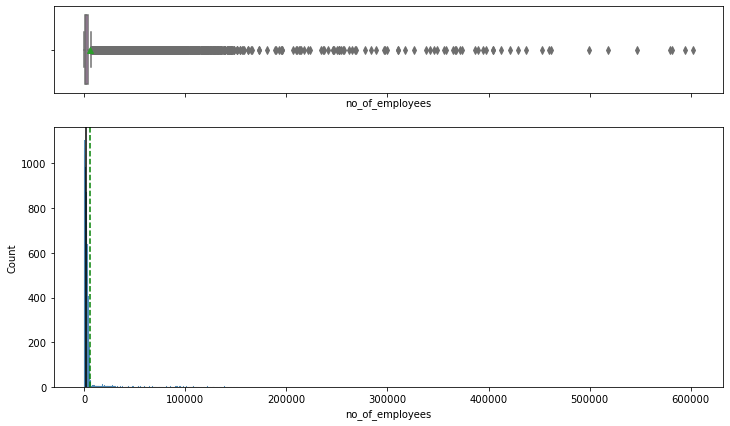

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "no_of_employees")

- Many employers are small and have low number of employees while there are some bigger companies with more employees.

#### Observations on employer's year of stablishment

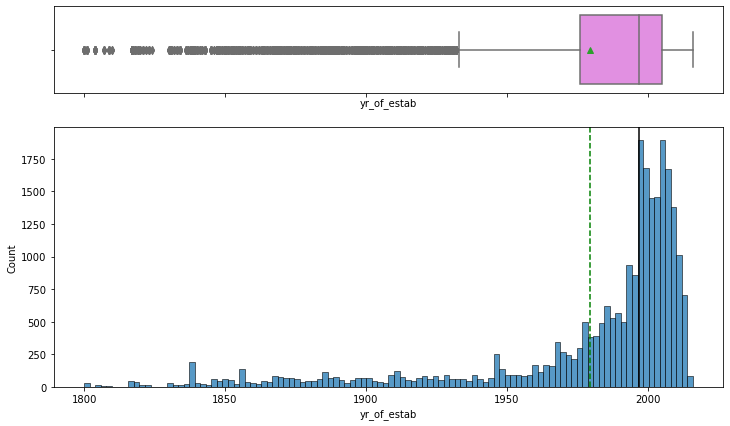

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "yr_of_estab")

- More than half of the companies are established after 2000 while there are some older companies. 

Lets convert year of establishment to age of the company

In [ ]:
data["employer_age"] = 2016 - data["yr_of_estab"]

<IPython.core.display.Javascript object>

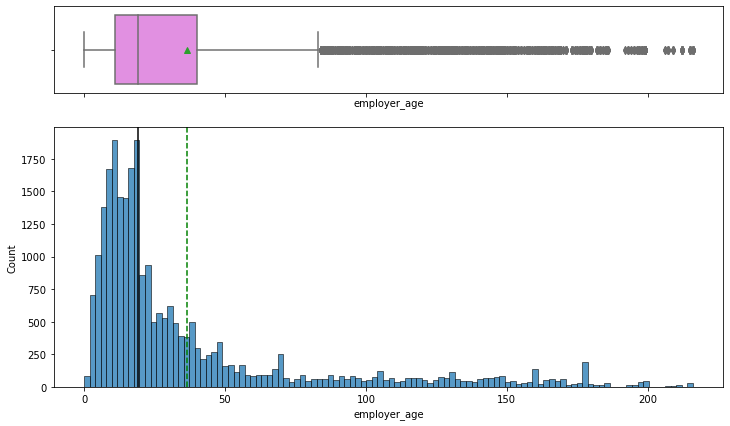

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "employer_age")

In [ ]:
# dropping the ye_of_estab since employer_age is added
data = data.drop("yr_of_estab", axis=1)

<IPython.core.display.Javascript object>

#### Observations on prevailing wage

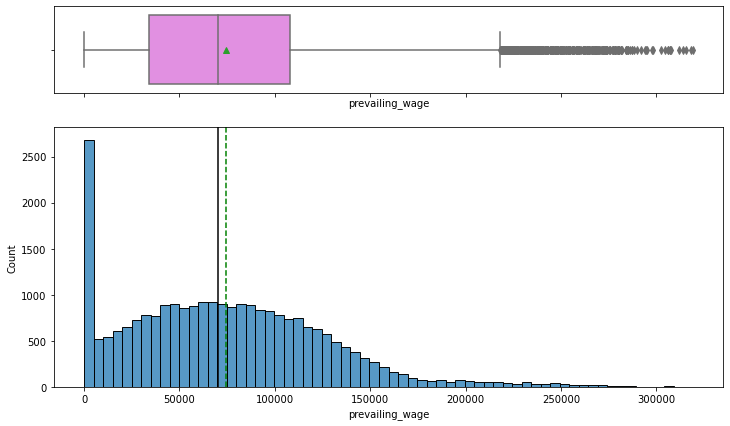

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "prevailing_wage")

- Prevailing wage are in all different units. There are many wages with small value which could be hourly while the higher numbers could be in yearly.

In [ ]:
data[data["prevailing_wage"] < 150]["unit_of_wage"].value_counts()

Hour    530
Year     10
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

- Most of the wages less than 150 are hourly as expected.

In [ ]:
data[data["prevailing_wage"] > 200000]["unit_of_wage"].value_counts()

Year     627
Month      6
Week       3
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

- Similarly, most of the wages above 200000 are yearly.

Let's review the distribution of the prevailing wage per each unit of wage

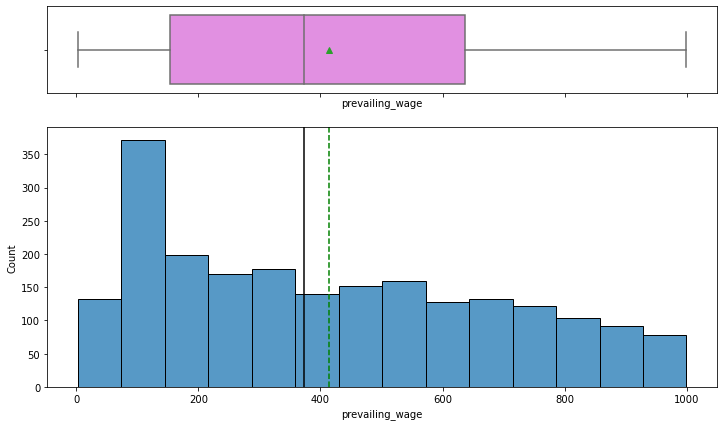

<IPython.core.display.Javascript object>

In [ ]:
# Hourly wage
histogram_boxplot(data[data["unit_of_wage"] == "Hour"], "prevailing_wage")

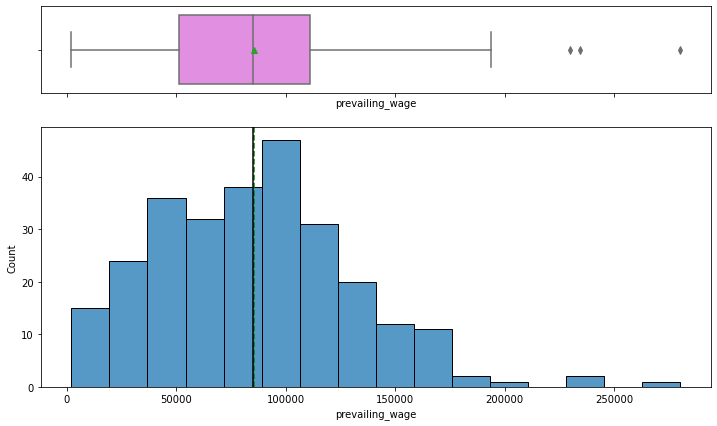

<IPython.core.display.Javascript object>

In [ ]:
# Weekly wage
histogram_boxplot(data[data["unit_of_wage"] == "Week"], "prevailing_wage")

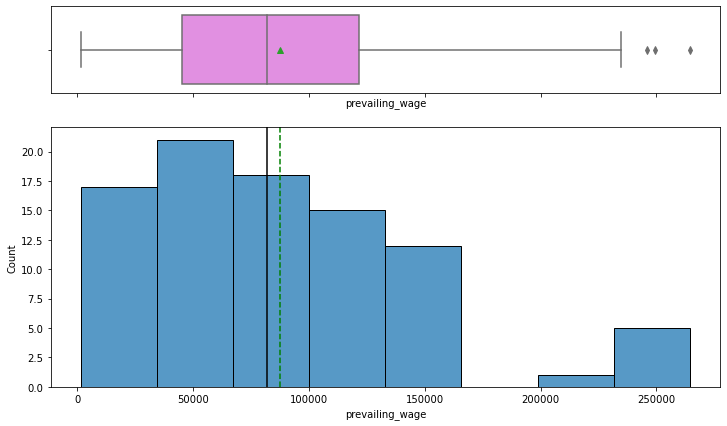

<IPython.core.display.Javascript object>

In [ ]:
# Monthly wage
histogram_boxplot(data[data["unit_of_wage"] == "Month"], "prevailing_wage")

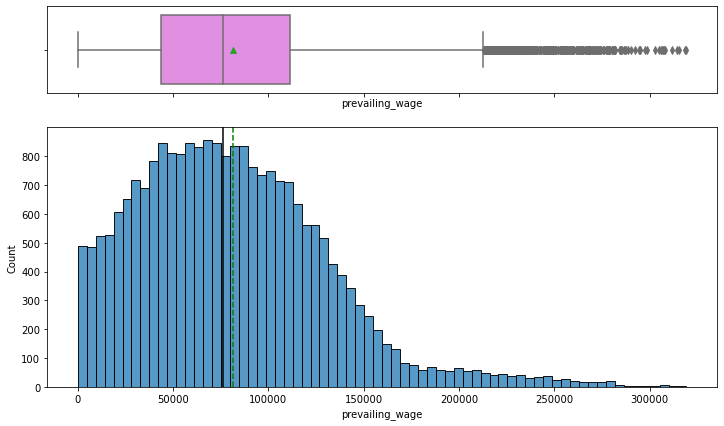

<IPython.core.display.Javascript object>

In [ ]:
# Yearly wage
histogram_boxplot(data[data["unit_of_wage"] == "Year"], "prevailing_wage")

- The majority of the prevailing wages are in yearly unit. The distribution of the yearly prevailing wage records shows some right skewness.

#### Observations on the categorical columns

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().sort_values(ascending=False).index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

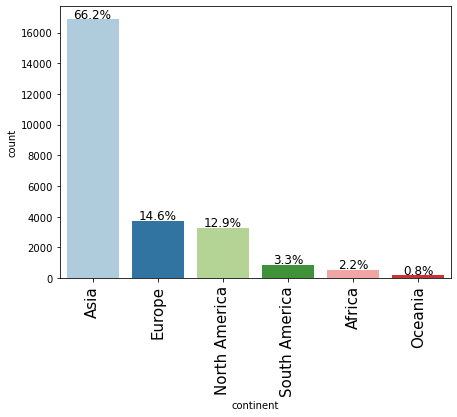

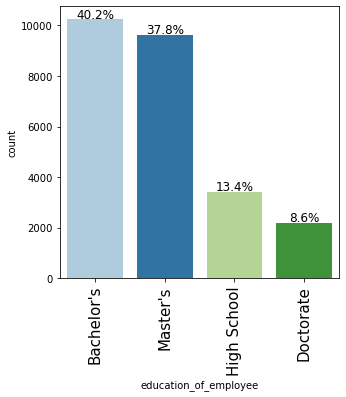

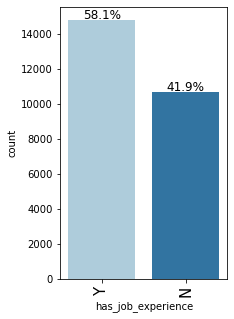

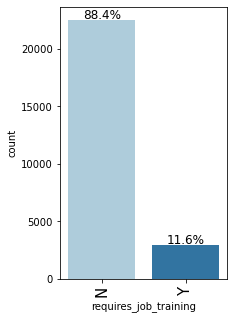

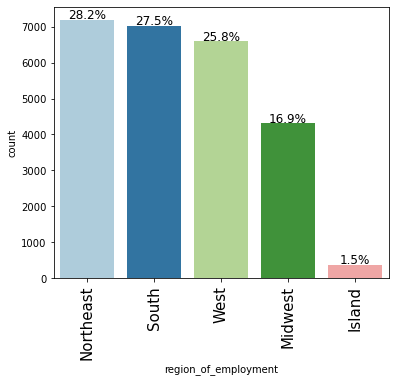

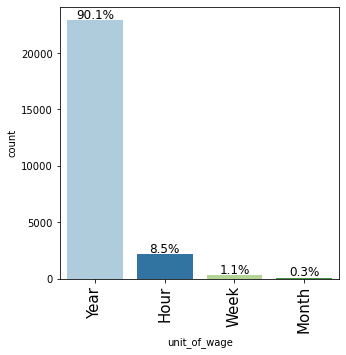

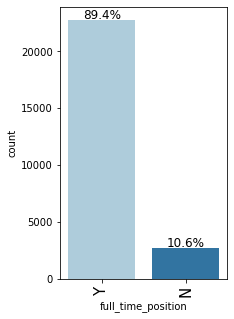

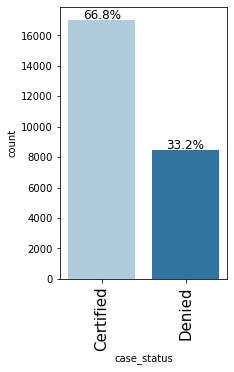

<IPython.core.display.Javascript object>

In [ ]:
for col in cat_columns:
    labeled_barplot(
        data, col, perc=True, n=(None if data[col].value_counts().shape[0] < 20 else 20)
    )

#### Observations
- The majority of the applicants are from Asia
- Most of the applicant does not require training and simillarly more than half of the applicants have previous experience
- About 90% of the applications are for full time positions

### Bivariate Analysis

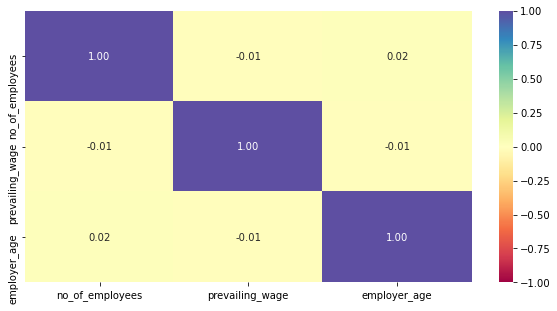

<IPython.core.display.Javascript object>

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- No significant correlation between numeric attributes

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Leading Questions:

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


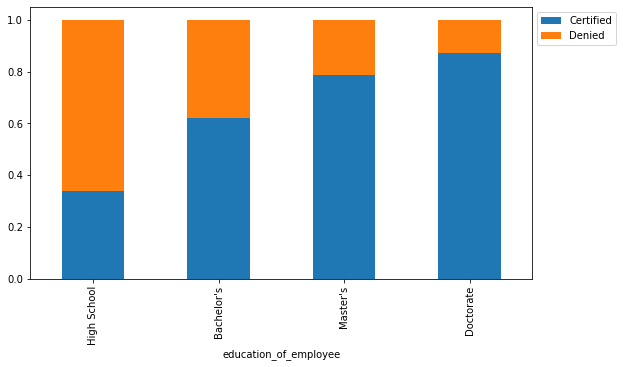

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

- The rate of approval is higher as education goes higher
- More than 60% of applicants with high school degrees are denied

#### 2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


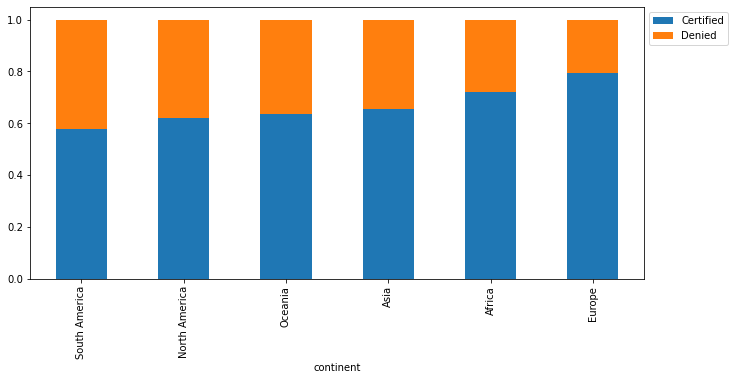

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "continent", "case_status")

- Rate of approval is highest for Europe and lowest for South America

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


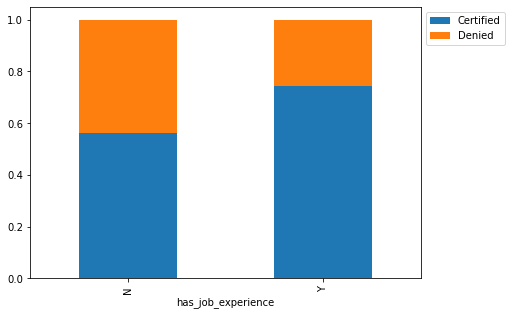

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

- Applicants with previous job experience are more likely to get certified

Usually, more applicant without previous job experience required to have training before starting new job in comparison to employees with job experience. Lets check if there is such relationship:

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


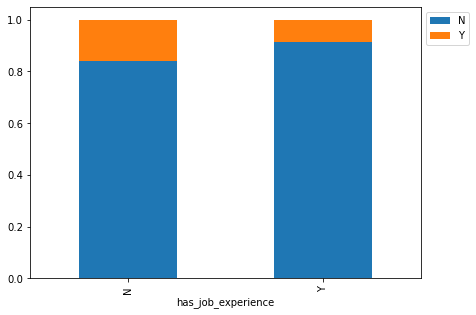

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

- There are more applicants with job experience who require training but not significantly influencive. Note more than 88% of the applicants require training without considering if they have previous job experience or not.

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


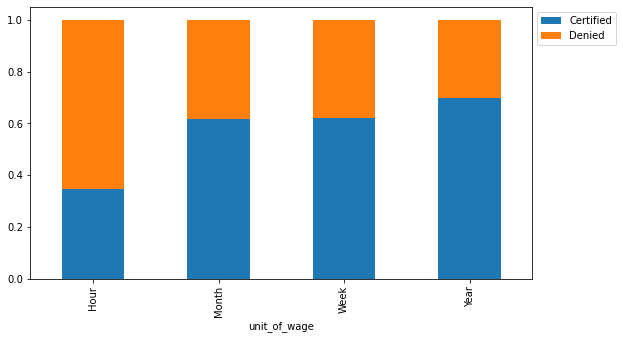

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

- Applicant with yearly wage have higher chance for certification

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

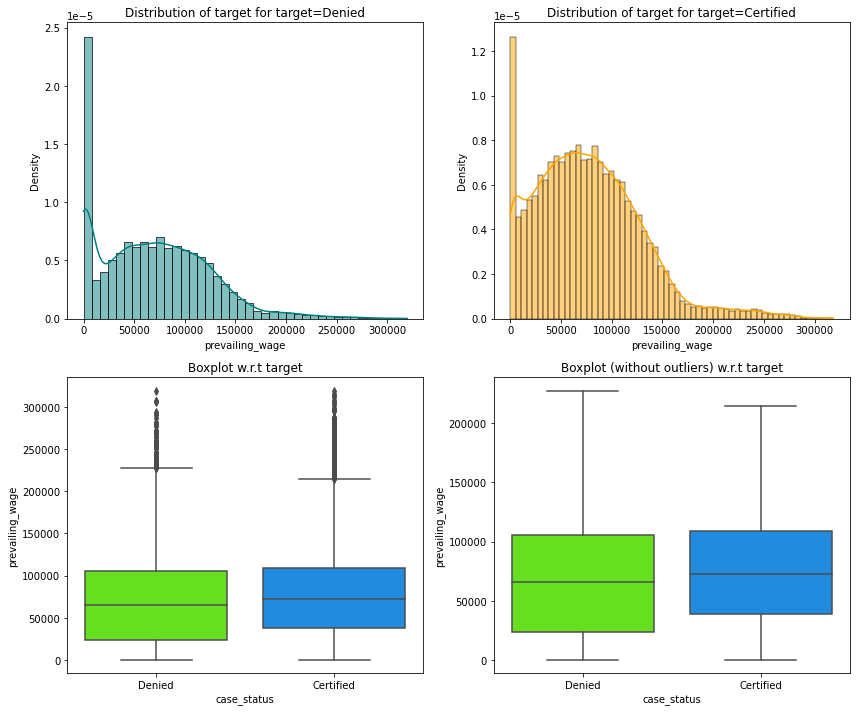

<IPython.core.display.Javascript object>

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

### Data Preparation


**Encoding certified visas to 1 and denied as 0 sice we are interested in the certified visa applications**

In [ ]:
data["case_status"] = [1 if i == "Certified" else 0 for i in data["case_status"]]

<IPython.core.display.Javascript object>

**Creating training and test sets.**

In [ ]:
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

# create dummies for X
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The train_test_performance function is created to have train and test performances side by side for better visualization/comparison
* The train_test_confusion_matrix_sklearn function will be used to plot the confusion matrix for both training and testing sets side by side

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


#### Display training and testing performance dataframes side-by-side ####

from IPython.display import display_html


def train_test_performance(model, X_train, y_train, X_test, y_test, space=70):

    df_train = model_performance_classification_sklearn(model, X_train, y_train)
    df_test = model_performance_classification_sklearn(model, X_test, y_test)

    train_styler = df_train.style.set_table_attributes(
        "style='display:inline'"
    ).set_caption("Training Performance")
    test_styler = df_test.style.set_table_attributes(
        "style='display:inline'"
    ).set_caption("Testing Performance")

    space = "\xa0" * space

    return display_html(
        train_styler._repr_html_() + space + test_styler._repr_html_(), raw=True
    )

<IPython.core.display.Javascript object>

In [ ]:
# function to create training and testing confusion matrixes side-by-side
def train_test_confusion_matrix_sklearn(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train)
    cm_train = confusion_matrix(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_test_pred)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    fig.subplots_adjust(wspace=0.5)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)
    sns.heatmap(cm_train, annot=labels, fmt="", ax=ax1)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)
    sns.heatmap(cm_test, annot=labels, fmt="", ax=ax2)
    
    
    ax1.set_title('Training Confusion Matrix')
    ax2.set_title('Testing Confusion Matrix')
    ax1.set(ylabel='True label', xlabel='Predicted label')
    ax2.set(ylabel='True label', xlabel='Predicted label')

    plt.show()


<IPython.core.display.Javascript object>

## Building bagging and boosting models

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

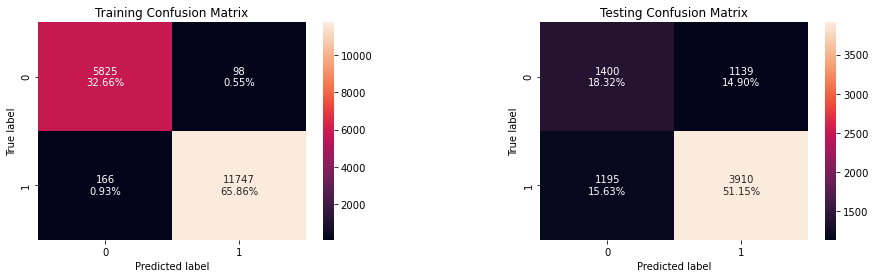

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(bagging, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(bagging, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.985198,0.986066,0.991726,0.988888
,Accuracy,Recall,Precision,F1
0,0.694662,0.765916,0.774411,0.770140


<IPython.core.display.Javascript object>

- Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of f1 score.

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

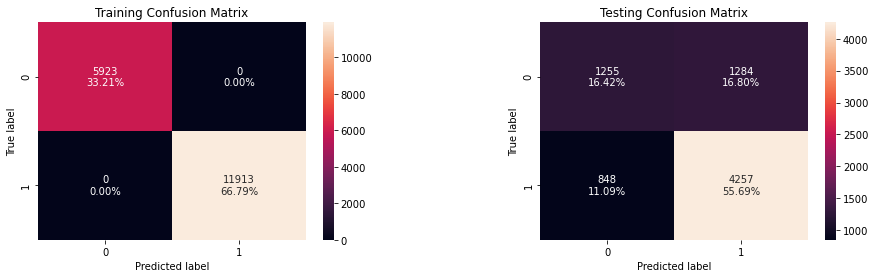

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(rf, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(rf, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,1.000000,1.000000,1.000000,1.000000
,Accuracy,Recall,Precision,F1
0,0.721088,0.833888,0.768273,0.799737


<IPython.core.display.Javascript object>

- Random Forest model with default parameter is very overfitted as expected.
- Model tuning will be done later to find best hyperparameter and reduce model overfit.

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

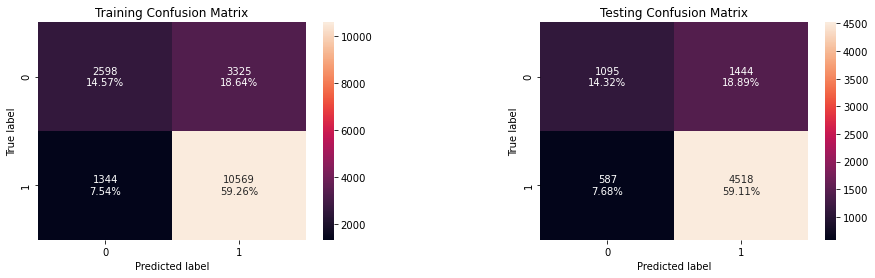

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(ab_classifier, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(ab_classifier, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.819080
,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


<IPython.core.display.Javascript object>

- AdaBoost is generalizing well in comparing to the previous models but the performance could be better in terms of f1 score. About 82% of the data on both training and testing sets can be explained correctly with the AdaBoost model.

### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

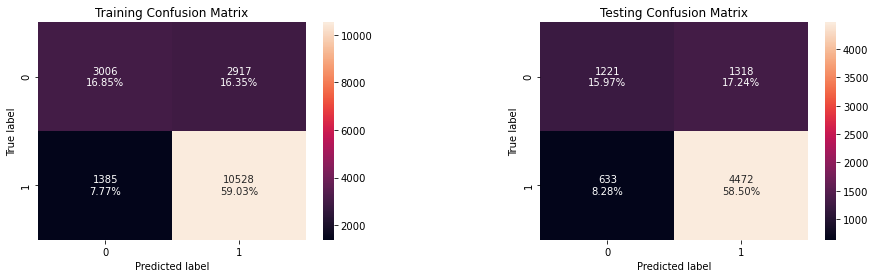

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(gb_classifier, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(gb_classifier, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.758802,0.883740,0.783042,0.830349
,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


<IPython.core.display.Javascript object>

- Gradient Boosting classifier is also generalizing well with slightly beter performance in terms of f1 score in comparison to AdaBoost classifier.

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

#### Checking model performance

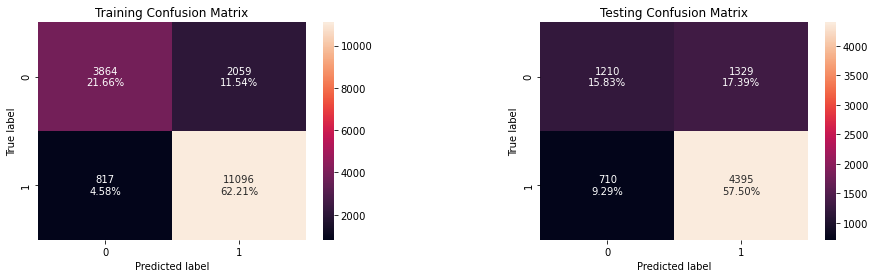

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(xgb_classifier, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(xgb_classifier, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272
,Accuracy,Recall,Precision,F1
0,0.733255,0.860921,0.767820,0.811709


<IPython.core.display.Javascript object>

- XGBoost Classifer is performing better on the training set and it shows some degree of overfitting since the performance on the testing set is not similarly good. 

##  Will tuning the hyperparameters improve the model performance?

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
%%time

# Choose the type of classifier.
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators':[10,50,100, 200],
              "max_samples": [0.7, 0.8, 0.9],
              'max_features': [0.5, 0.7, 0.9]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

Wall time: 8min 35s


BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=200,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

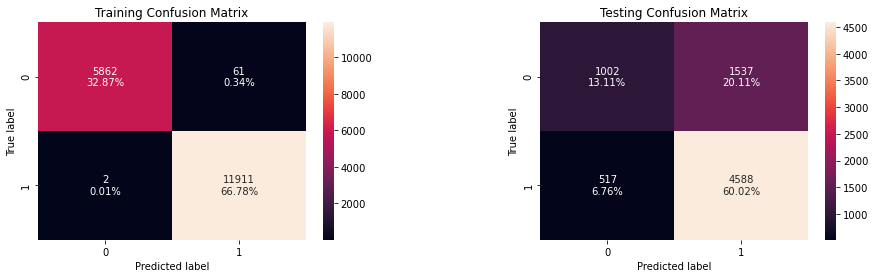

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(bagging_tuned, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(bagging_tuned, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.996468,0.999832,0.994905,0.997362
,Accuracy,Recall,Precision,F1
0,0.731293,0.898727,0.749061,0.817097


<IPython.core.display.Javascript object>

- No significant change to the bagging classifier after tuning. Model is still overfit.

### Hyperparameter Tuning - Random Forest

In [ ]:
%%time

# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": [5, 10, 15],
    "max_features": [0.7, 0.9, "sqrt", "log2", "auto"],
    "min_samples_split": [3, 6, 9],
    "n_estimators": [100, 200, 500],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Wall time: 22min 52s


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       n_estimators=200, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

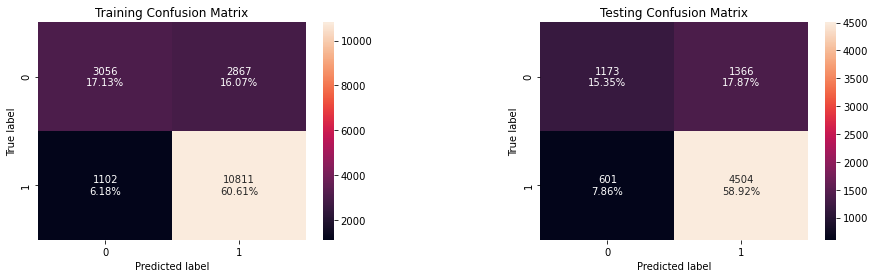

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(rf_tuned, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(rf_tuned, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.777473,0.907496,0.790393,0.844906
,Accuracy,Recall,Precision,F1
0,0.742674,0.882272,0.767291,0.820774


<IPython.core.display.Javascript object>

- Random Forest model after tuning shows improved in terms of overfitting. Performance and f1 score also increased slightly on the testing set.

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
%%time

# Choose the type of classifier.
ab_classifier_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
    ],
    "n_estimators": [50, 100, 200],
    "learning_rate": np.arange(0.05, 0.21, 0.05),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_classifier_tuned.fit(X_train, y_train)

Wall time: 4min 4s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

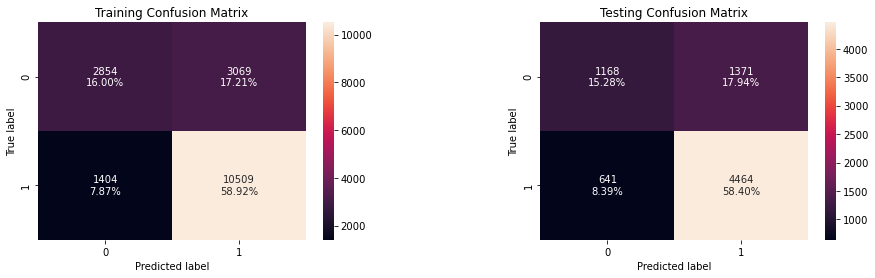

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(
    ab_classifier_tuned, X_train, y_train, X_test, y_test
)

In [ ]:
train_test_performance(ab_classifier_tuned, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.749215,0.882146,0.773973,0.824526
,Accuracy,Recall,Precision,F1
0,0.736787,0.874437,0.765039,0.816088


<IPython.core.display.Javascript object>

- No significant improvement to the AdaBoosting model after tuning. Grid search can be used to try more different hyperparameters and potentially get better performance.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
%%time

# Choose the type of classifier.
gb_classifier_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {'n_estimators': [100, 200], 
              'subsample':[0.7, 0.8, 0.9],
              'max_features':[0.8, 0.9, 1],
              'max_depth':[3, 7, 10]
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_classifier_tuned.fit(X_train, y_train)

Wall time: 18min 16s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

#### Checking model performance

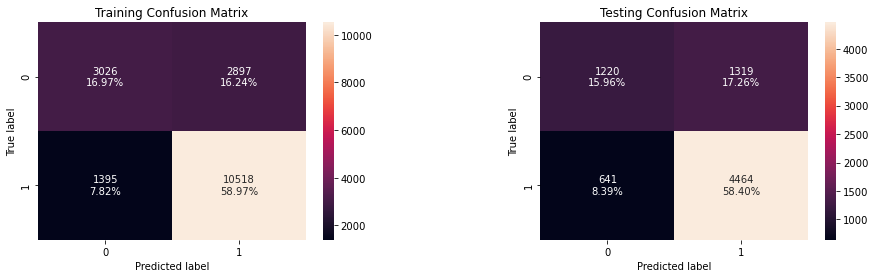

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(
    gb_classifier_tuned, X_train, y_train, X_test, y_test
)

In [ ]:
train_test_performance(gb_classifier_tuned, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.759363,0.882901,0.784048,0.830543
,Accuracy,Recall,Precision,F1
0,0.743590,0.874437,0.771918,0.819985


<IPython.core.display.Javascript object>

- Model is improved in terms of overfitting and f1 score is hogher slightly on the test set

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
%%time

# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {'n_estimators': [75,125,200], 
              'subsample':[0.7, 0.9],
              'gamma':[0, 1, 5],
              'colsample_bytree':[0.8, 1],
              'colsample_bylevel':[0.7, 0.9]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Wall time: 8min 25s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

#### Checking model performance

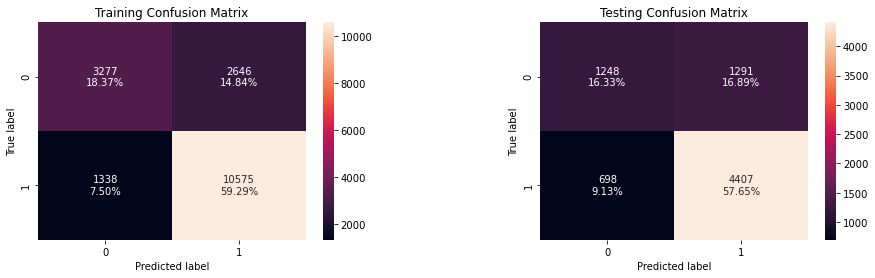

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(xgb_tuned, X_train, y_train, X_test, y_test)

In [ ]:
train_test_performance(xgb_tuned, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.776632,0.887686,0.799864,0.841490
,Accuracy,Recall,Precision,F1
0,0.739796,0.863271,0.773429,0.815884


<IPython.core.display.Javascript object>

### Stacking Classifier with tuned models

In [ ]:
%%time

estimators = [
    ("AdaBoost", ab_classifier_tuned),
    ("Gradient Boosting", gb_classifier_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

stacking_classifier.fit(X_train,y_train)

Wall time: 48.5 s


StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                         random_state=1),
                                                   learning_rate=0.05,
                                                   n_estimators=200,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Random Forest',
                                RandomForestC...
                                   

<IPython.core.display.Javascript object>

#### Checking model performance on training set

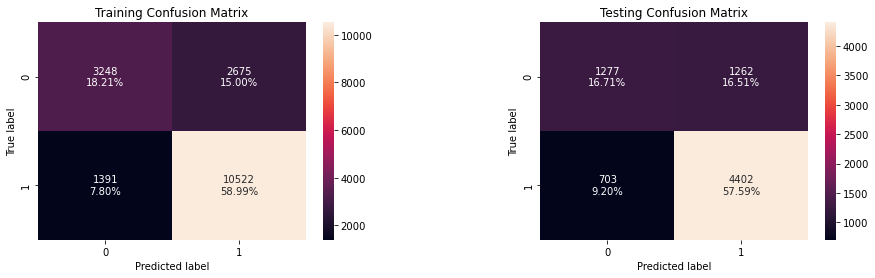

<IPython.core.display.Javascript object>

In [ ]:
train_test_confusion_matrix_sklearn(
    stacking_classifier, X_train, y_train, X_test, y_test
)

In [ ]:
train_test_performance(stacking_classifier, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.772034,0.883237,0.797302,0.838072
,Accuracy,Recall,Precision,F1
0,0.742936,0.862292,0.777189,0.817532


<IPython.core.display.Javascript object>

### Conclusion

**Comparing all models**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_performance_classification_sklearn(bagging, X_train, y_train).T,
        model_performance_classification_sklearn(bagging_tuned, X_train, y_train).T,
        model_performance_classification_sklearn(rf, X_train, y_train).T,
        model_performance_classification_sklearn(rf_tuned, X_train, y_train).T,
        model_performance_classification_sklearn(ab_classifier, X_train, y_train).T,
        model_performance_classification_sklearn(
            ab_classifier_tuned, X_train, y_train
        ).T,
        model_performance_classification_sklearn(gb_classifier, X_train, y_train).T,
        model_performance_classification_sklearn(
            gb_classifier_tuned, X_train, y_train
        ).T,
        model_performance_classification_sklearn(xgb_classifier, X_train, y_train).T,
        model_performance_classification_sklearn(xgb_tuned, X_train, y_train).T,
        model_performance_classification_sklearn(
            stacking_classifier, X_train, y_train
        ).T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.985198,0.996468,1.0,0.777473,0.738226,0.749215,0.758802,0.759363,0.838753,0.776632,0.772034
Recall,0.986066,0.999832,1.0,0.907496,0.887182,0.882146,0.883740,0.882901,0.931419,0.887686,0.883237
Precision,0.991726,0.994905,1.0,0.790393,0.760688,0.773973,0.783042,0.784048,0.843482,0.799864,0.797302
F1,0.988888,0.997362,1.0,0.844906,0.819080,0.824526,0.830349,0.830543,0.885272,0.841490,0.838072


<IPython.core.display.Javascript object>

In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        model_performance_classification_sklearn(bagging, X_test, y_test).T,
        model_performance_classification_sklearn(bagging_tuned, X_test, y_test).T,
        model_performance_classification_sklearn(rf, X_test, y_test).T,
        model_performance_classification_sklearn(rf_tuned, X_test, y_test).T,
        model_performance_classification_sklearn(ab_classifier, X_test, y_test).T,
        model_performance_classification_sklearn(ab_classifier_tuned, X_test, y_test).T,
        model_performance_classification_sklearn(gb_classifier, X_test, y_test).T,
        model_performance_classification_sklearn(gb_classifier_tuned, X_test, y_test).T,
        model_performance_classification_sklearn(xgb_classifier, X_test, y_test).T,
        model_performance_classification_sklearn(xgb_tuned, X_test, y_test).T,
        model_performance_classification_sklearn(stacking_classifier, X_test, y_test).T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.694662,0.731293,0.721088,0.742674,0.734301,0.736787,0.744767,0.743590,0.733255,0.739796,0.742936
Recall,0.765916,0.898727,0.833888,0.882272,0.885015,0.874437,0.876004,0.874437,0.860921,0.863271,0.862292
Precision,0.774411,0.749061,0.768273,0.767291,0.757799,0.765039,0.772366,0.771918,0.767820,0.773429,0.777189
F1,0.770140,0.817097,0.799737,0.820774,0.816481,0.816088,0.820927,0.819985,0.811709,0.815884,0.817532


<IPython.core.display.Javascript object>

* Bagging classifier overfitted the data before and after tuning.
* Random Forest with default parameters overfitted while the tuned Random Forest model performed better. There may be yet better parameters which may result in a better performance as the final results depend on the parameters used/checked using GridSearchCV.
- The gradient boosting before and after tuning are almost performing similar and as the best models here. They have highes f1 score of approx 82% on the testing set (as well as training set_

### Important features of the final model - Graidient Boost Classifier

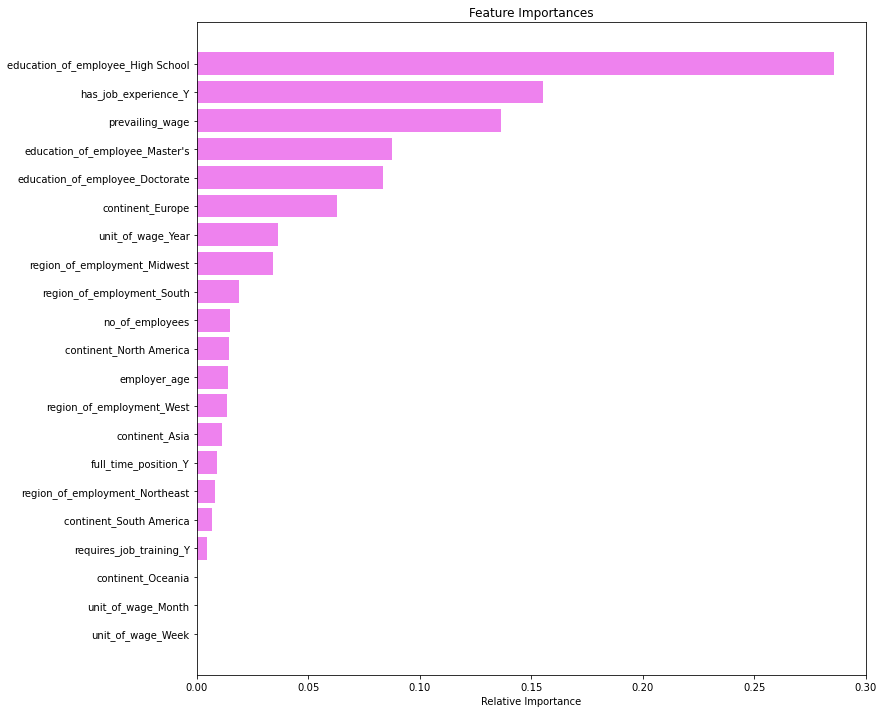

<IPython.core.display.Javascript object>

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Actionable Insights and Recommendations

- Different classification models with bagging and boosting methodology are created that can help the OFLS to facilitate the process of vsa approvals. The ability to predict the number of approvals can be helpful for cost and resources allocations from OFLS and better planning.
- High school diploma as applicant's education has heavy impact on the approval rate. Applicants with higher education are more likely to get certified and applicants with high school education are more likely to get denied.
- Having previous job experience can have high impact on chance of approval.
- Applicants who have yearly wage are more likely to be certified.
- Prevailing wage is another factor with high importance on approval rate. Applicants with higher prevailing wages have higher chancel to get certified.
- Majority of applicants are from Asia, and the highest approval rate is for Europe.
- OFLS can use this model to predict if applicants will get approved or denied with approximately 82% accuracy.